In [2]:
# Import Pandas
import pandas as pd

# Define file containing dataset
runkeeper_file = 'cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters
df_activities = pd.read_csv(runkeeper_file, parse_dates = True, index_col = 'Date')

# First look at exported data: select sample of 3 random rows
display(df_activities.sample(3))

# Print DataFrame summary
print(df_activities.info())


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2017-06-15 18:54:32,86cdd8ff-11c5-4c6a-b221-3e65a88cc136,Running,NaN,12.80,1:06:15,5:10,11.59,901.000000,128,147.0,NaN,TomTom MySports Watch,2017-06-15-185432.gpx
2016-06-14 18:40:51,86208dc5-01ec-4383-8284-89afd17ff565,Running,NaN,13.21,1:08:35,5:11,11.56,904.999999,119,155.0,NaN,TomTom MySports Watch,2016-06-14-184051.gpx
2017-04-01 16:56:53,410ddb93-7109-4248-9ca6-86da1fdd311b,Running,NaN,13.53,1:14:46,5:32,10.86,955.999999,196,146.0,NaN,TomTom MySports Watch,2017-04-01-165653.gpx


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [3]:
# Define list of columns to be deleted 
cols_to_drop = ['Friend\'s Tagged', 'Route Name', 'GPX File', 'Activity Id', 'Calories Burned', 'Notes']

# Delete unnecessary columns 
df_activities.drop(cols_to_drop, axis=1, inplace=True)
print(df_activities.head())

# Count types of training activities 
print(df_activities.value_counts('Type'))

# Rename 'Other' Type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].str.replace('other', 'Unicycling')

# Count missing values for each column
print(df_activities.isnull().sum())

                        Type  Distance (km) Duration Average Pace  \
Date                                                                
2018-11-11 14:05:12  Running          10.44    58:40         5:37   
2018-11-09 15:02:35  Running          12.84  1:14:12         5:47   
2018-11-04 16:05:00  Running          13.01  1:15:16         5:47   
2018-11-01 14:03:58  Running          12.98  1:14:25         5:44   
2018-10-27 17:01:36  Running          13.02  1:12:50         5:36   

                     Average Speed (km/h)  Climb (m)  Average Heart Rate (bpm)  
Date                                                                            
2018-11-11 14:05:12                 10.68        130                     159.0  
2018-11-09 15:02:35                 10.39        168                     159.0  
2018-11-04 16:05:00                 10.37        171                     155.0  
2018-11-01 14:03:58                 10.47        169                     158.0  
2018-10-27 17:01:36           

In [4]:
# Calculate the sample means for heart rate for each training type
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_walk = df_activities[df_activities['Type'] == 'Walking']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities 
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()

# Filling the missing values with counted means 
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_walk['Average Heart Rate (bpm)'].fillna(float(avg_hr_walk), inplace=True)

# Count missing values for each column in running data
print(df_run.isnull().sum())

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


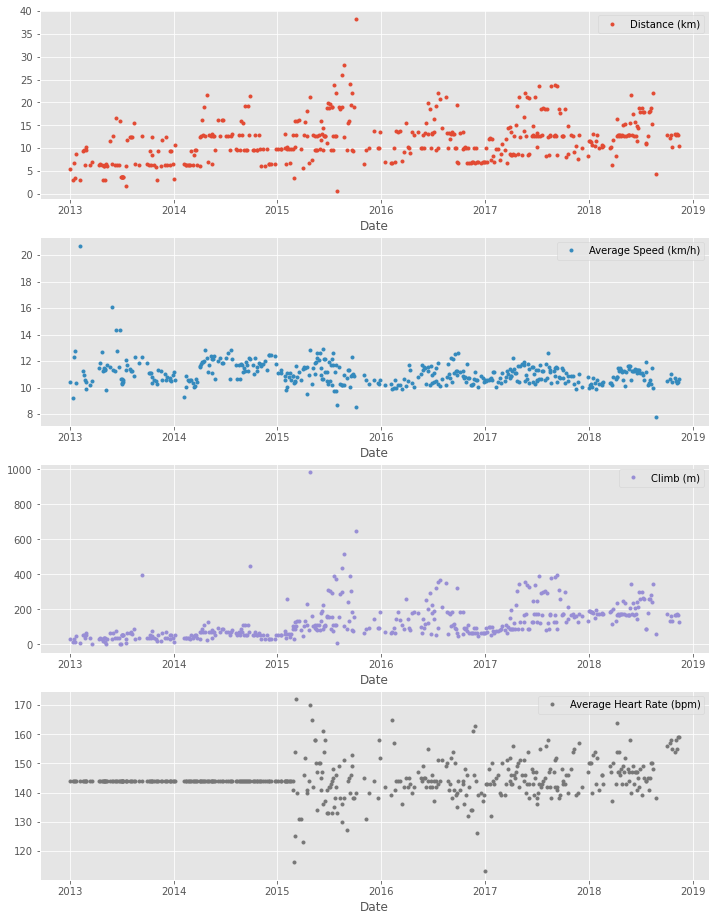

In [5]:
%matplotlib inline

# Import matplotlib, set style and ignore warning 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

plt.style.use('ggplot')
warnings.filterwarnings(action='ignore', module='matplotlib.figure', category=UserWarning,
                       message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
                       )
# prepare data subsetting period from 2013 to 2018
runs_subset_2013_2018 = df_run.loc['20190101':'20130101']

# Create plotand customize in one step
runs_subset_2013_2018.plot(subplots=True,
                           sharex=False,
                           figsize=(12,16),
                           linestyle='none',
                           marker='o',
                           markersize=3
                           )

# Show plot
plt.show()

In [6]:
# Prepare running data for the last 4 years 
runs_subset_2015_2018 = df_run.loc['20190101':'20150101']

# Calculate annual statistics 
print('How my average run looks in last 4 years:')
display(runs_subset_2015_2018.resample('A').mean())

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
display(runs_subset_2015_2018.resample('W').mean())

# Mean weekly counts
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print('How many trainings per week I had on average:', weekly_counts_average)

How my average run looks in last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-01-04,9.780000,11.120000,51.0,144.0
2015-01-11,NaN,NaN,NaN,NaN
2015-01-18,9.780000,11.230000,51.0,144.0
2015-01-25,NaN,NaN,NaN,NaN
2015-02-01,9.893333,10.423333,58.0,144.0
...,...,...,...,...
2018-10-14,12.620000,10.840000,146.5,157.5
2018-10-21,10.290000,10.410000,133.0,155.0
2018-10-28,13.020000,10.730000,170.0,154.0


How many trainings per week I had on average: 1.5


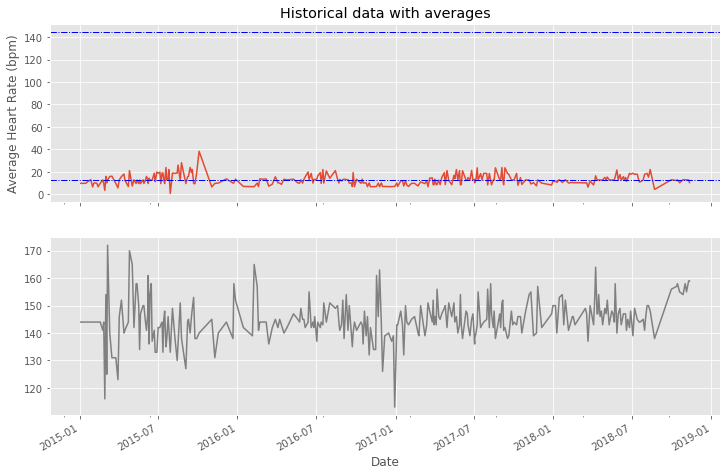

In [7]:
# Prepare data 
runs_subset_2015_2018 = df_run['2018':'2015']
runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create plot
fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(12,8))

# Plot and customize first subplot 
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax1.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax1.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# show plot
plt.show()

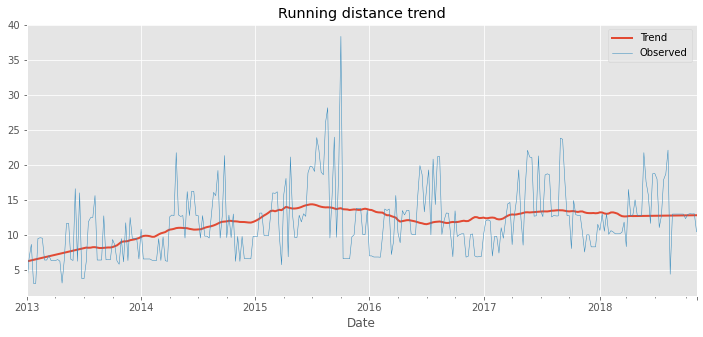

In [8]:
# Import statsmodels library
import statsmodels.api as sm

# Prepare data 
df_run_dist_wkly = df_run.loc['20190101':'20130101']['Distance (km)']\
                    .resample('W').bfill()
decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, extrapolate_trend=1, period=52)

# Create plot 
fig = plt.figure(figsize=(12,5))

# Plot and customize
ax=decomposed.trend.plot(label='Trend', linewidth=2)
ax=decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')

# Show plot
plt.show()

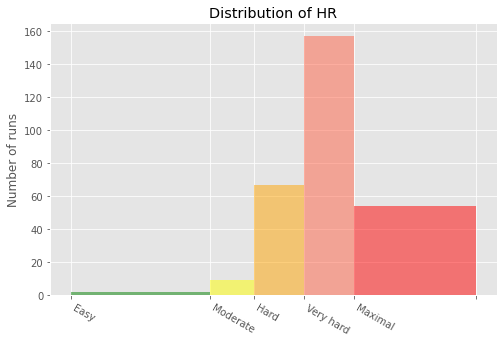

In [11]:
# Prepare data 
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal', '']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['2019':'2015-03']['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(8,5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.set_xticks(hr_zones)
ax.set_xticklabels(zone_names, rotation=-30, ha='left')

# Show plot
plt.show()

In [15]:
# Concatenating three DataFrames
df_run_walk_cycle = df_run.append([df_walk, df_cycle]).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities 
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Total for diffrent training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]
    
print('Summary statistics for diffrent training types:')
df_summary.stack()

Total for diffrent training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for diffrent training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000

In [16]:
# Count average shoes per lifetime (as km per pair) using our fun facts
average_shoes_lifetime = 5224/7

# Count number of shoes for Forest's run distance
shoes_for_forest_run = 24700 // average_shoes_lifetime

print('Forest Gump would need {} pairs of shoes!'.format(shoes_for_forest_run))

Forest Gump would need 33.0 pairs of shoes!
